# Creating Train and Test sets for Malaria Cell Dataset

### Loading the Data

In [1]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

### Loading images and scaling them 

In [2]:
data = []
labels = []

In [3]:
Parasitized = os.listdir("../Malaria_detection/cell_images/Parasitized/")

for a in Parasitized:
    
    try:
        image = cv2.imread("../Malaria_detection/cell_images/Parasitized/" + a)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((50, 50))
        data.append(np.array(size_image))
        labels.append(0)
    
    except AttributeError:
        print("")

In [4]:
Uninfected = os.listdir("../Malaria_detection/cell_images/Uninfected/")

for b in Uninfected:

    try:
        image = cv2.imread("../Malaria_detection/cell_images/Uninfected/" + b)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((50, 50))
        data.append(np.array(size_image))
        labels.append(1)
    
    except AttributeError:
        print("")

In [5]:
# Creating single numpy array of all the images and labels
data = np.array(data)
labels = np.array(labels)

In [6]:
# to save
np.save('Data' , data)
np.save('Labels' , labels)

In [7]:
print('Cells : {} and labels : {}'.format(data.shape , labels.shape))

Cells : (27558, 50, 50, 3) and labels : (27558,)


### Lets take a look at an Parasitized and Uninfected cell

0

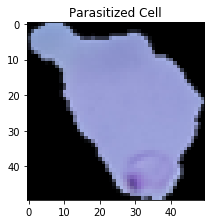

In [8]:
plt.figure(figsize = (7 , 7))
plt.imshow(data[100])
plt.title('Parasitized Cell')
labels[100]

1

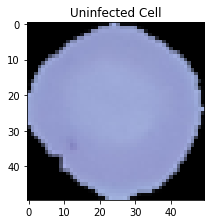

In [9]:
# lets take a look at an Uninfected cell
plt.figure(figsize = (7 , 7))
plt.imshow(data[15000])
plt.title('Uninfected Cell')
labels[15000]

In [10]:
# lets shuffle the data and labels before splitting them into training and testing sets
n = np.arange(data.shape[0])
np.random.shuffle(n)
data = data[n]
labels = labels[n]

0

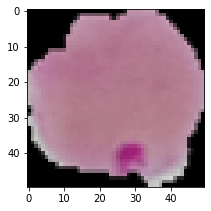

In [15]:
plt.figure(figsize = (7 , 7))
plt.imshow(data[10000])
labels[10000]
# 1 is uninfected and 0 is parasitized

### Splitting the dataset into the Training set and Test set

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 0)

In [14]:
print('Train data shape {} ,Test data shape {} '.format(X_train.shape, X_test.shape))

Train data shape (22046, 50, 50, 3) ,Test data shape (5512, 50, 50, 3) 
